In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('darkgrid')
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:

df = pd.read_csv('forestdata.csv')


df.head()
print(df.head().T)
df.info()


centres = [[-1., 0.], [1., -0.5], [0., 1.]]

df_forest = pd.read_csv("forestdata1.csv")
print(df_forest.describe())
print(df_forest.describe().T)


                   0         1        2      3      4
CountryCode      AFG       ALB      DZA    ASM    AND
1990         12084.4    7888.0  16670.0  180.7  160.0
2000         12084.4    7693.0  15790.0  177.3  160.0
2013         12084.4  7863.405  19408.0  173.4  160.0
2014         12084.4   7877.64  19484.0  173.1  160.0
2015         12084.4  7891.875  19560.0  172.8  160.0
2016         12084.4    7891.8  19560.0  172.5  160.0
2017         12084.4  7889.025  19430.0  172.2  160.0
2018         12084.4    7889.0  19300.0  171.9  160.0
2019         12084.4    7889.0  19390.0  171.6  160.0
2020         12084.4    7889.0  19490.0  171.3  160.0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CountryCode  255 non-null    object 
 1   1990         255 non-null    float64
 2   2000         255 non-null    float64
 3   2013         255 non-null    flo

               2000          2013          2014          2015          2016  \
count  2.550000e+02  2.550000e+02  2.550000e+02  2.550000e+02  2.550000e+02   
mean   1.684939e+06  1.648509e+06  1.645720e+06  1.642930e+06  1.640667e+06   
std    5.095846e+06  5.002817e+06  4.996278e+06  4.989752e+06  4.984980e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    3.508650e+03  3.745310e+03  3.732800e+03  3.724150e+03  3.728800e+03   
50%    3.838140e+04  3.640520e+04  3.613160e+04  3.585800e+04  3.586300e+04   
75%    3.118058e+05  2.878050e+05  2.865950e+05  2.853850e+05  2.849500e+05   
max    4.145927e+07  4.083866e+07  4.079379e+07  4.074891e+07  4.071630e+07   

               2017          2018  
count  2.550000e+02  2.550000e+02  
mean   1.637121e+06  1.634391e+06  
std    4.976272e+06  4.970259e+06  
min    0.000000e+00  0.000000e+00  
25%    3.733500e+03  3.738150e+03  
50%    3.612136e+04  3.611090e+04  
75%    2.843950e+05  2.838550e+05  


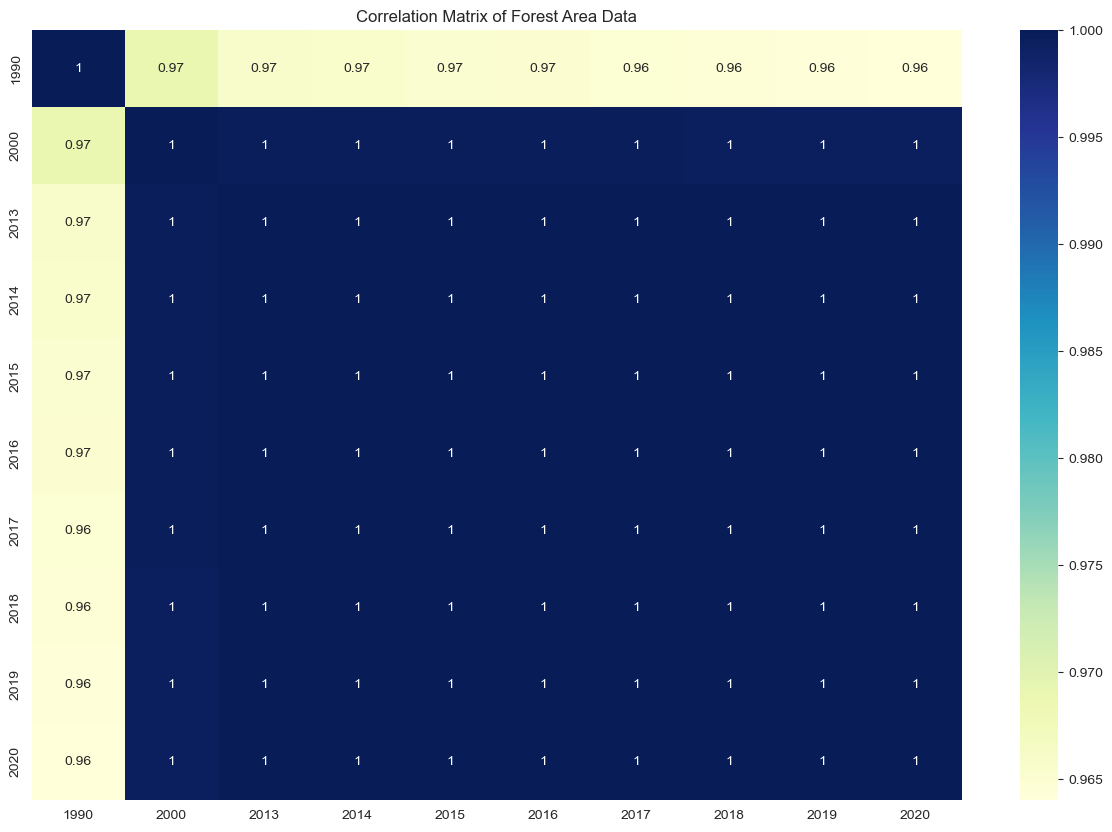

In [3]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


X= df.iloc[: , 1: :]
X

from sklearn.preprocessing import MinMaxScaler

# Drop unwanted columns
df_forest2 = df_forest.drop(["1990", "2019", "2020"], axis=1)

# Initialize scaler
scaler = MinMaxScaler()

# Print normalized dataframe
print(df_forest2.describe())



df_forest2 = df_forest.drop(['1990', '2000', '2013', '2015', '2017', '2019'], axis=1)
print(df_forest2.describe())

import cluster_tools as ct
corr = df_forest2.corr()
print(corr)


corr = df_forest.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(15, 10))
corr = corr.fillna(0)
sns.heatmap(corr, annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Forest Area Data")
plt.show()

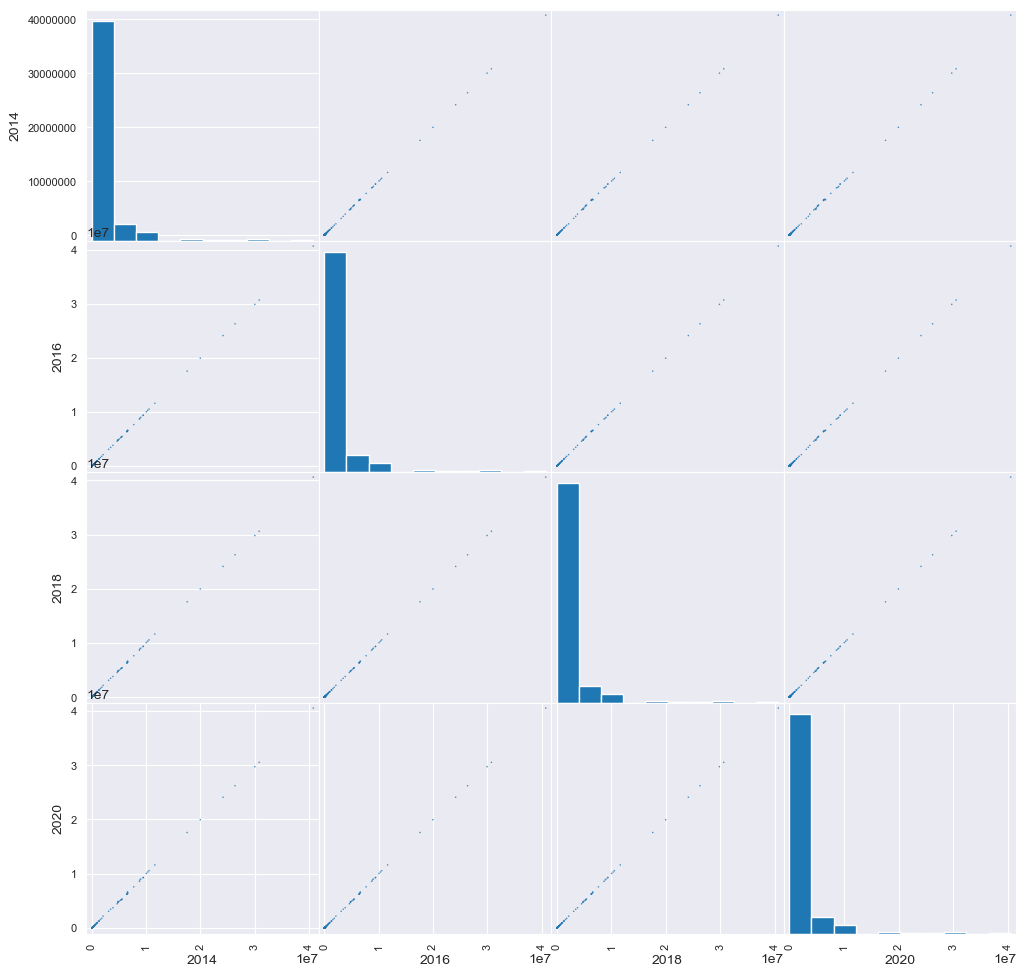

In [4]:
pd.plotting.scatter_matrix(df_forest2, figsize=(12, 12), s=5, alpha=0.8)
plt.show()


[0.21531476 1.08630561] 2
[-1.15241253 -0.0907223 ] 0
[ 0.68696419 -0.634541  ] 1
[-0.39740556  0.22284234] 0
[-0.43509588  1.3325919 ] 2
[-1.32439813  0.32119699] 0
[-0.12014757  0.96704729] 2
[ 1.33790976 -0.08039914] 1
[-1.01813018 -0.41198731] 0
[0.03129369 0.55985616] 2
[-1.44271634  0.43719972] 0
[-0.67344246  0.21818359] 0
[ 0.51633418 -0.35586369] 1
[-1.12512287  0.31074429] 0
[-0.29763435  0.52722612] 0
[ 0.28230744 -1.28542574] 1
[-0.8473067   0.01553046] 0
[ 0.86716242 -0.22640125] 1
[-1.46802293  0.16336638] 0
[ 0.32798884 -0.43473979] 1
[-1.  1.  0.]
[ 0.  -0.5  1. ]


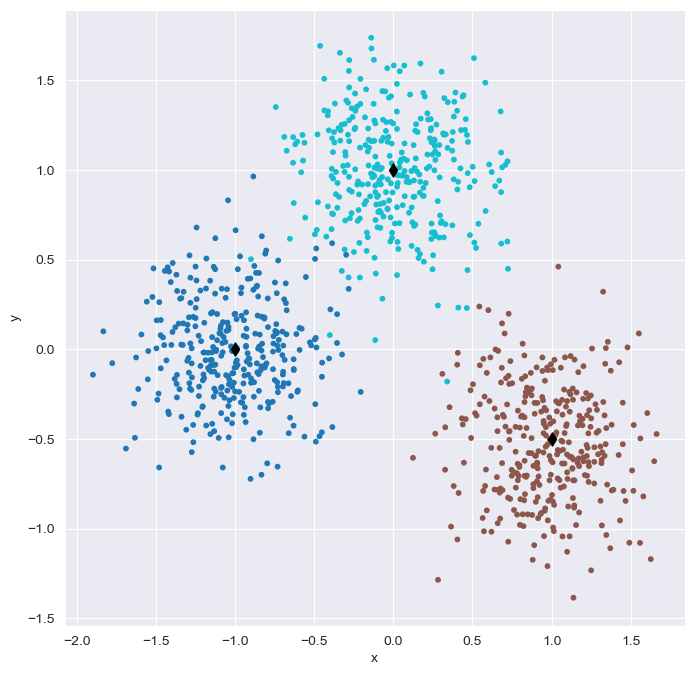

In [5]:
import sklearn.datasets as skdat
import numpy as np
import matplotlib.pyplot as plt

xy, nclust = skdat.make_blobs(1000, centers=centres, cluster_std=0.3)



for i in range(20):
  print(xy[i], nclust[i])


x = xy[:,0] # extract x and y vectors
y = xy[:,1]

centres_arr = np.array(centres)  # Convert centres to a numpy array
xcent = centres_arr[:, 0]
ycent = centres_arr[:, 1]

print(xcent)
print(ycent)


# cluster by cluster
plt.figure(figsize=(8.0, 8.0))
cm = plt.cm.get_cmap('tab10')
plt.scatter(x, y, 10, nclust, marker="o", cmap=cm)
plt.scatter(xcent, ycent, 45, "k", marker="d")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

[[-1.01720140e+00 -1.65382570e-02]
 [-5.37051670e-04  9.98114715e-01]
 [ 9.64212089e-01 -5.24099802e-01]]
0.6510002878262705


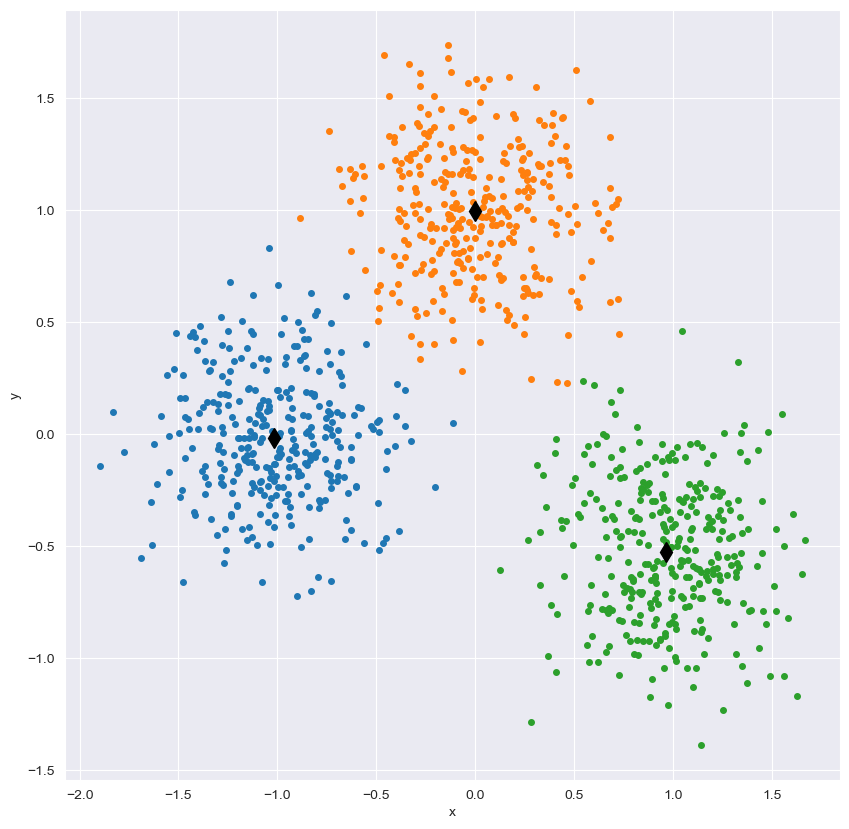

[1]
0.6510002878262705


In [6]:
# from sklearn import cluster
import sklearn.cluster as cluster
import sklearn.metrics as skmet
ncluster = 3
# set up the clusterer with the number of expected clusters
kmeans = cluster.KMeans(n_clusters=ncluster)
# Fit the data, results are stored in the kmeans object
kmeans.fit(xy) # fit done on x,y pairs
labels = kmeans.labels_
# print(labels) # labels is the number of the associated clusters of (x,y)␣
# for i in range(50):
# print(xy[i], labels[i])
# extract the estimated cluster centres
cen = kmeans.cluster_centers_
print(cen)
# calculate the silhoutte score
print(skmet.silhouette_score(xy, labels))
# plot using the labels to select colour
plt.figure(figsize=(10.0, 10.0))
col = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
for l in range(ncluster): # loop over the different labels
    plt.plot(x[labels==l], y[labels==l], "o", markersize=4, color=col[l])
# show cluster centres
for ic in range(ncluster):
    xc, yc = cen[ic,:]
    plt.plot(xc, yc, "dk", markersize=10)
plt.xlabel("x")
plt.ylabel("y")
plt.show()

print(kmeans.predict([[0.5, 0.5]]))

ncluster = 3
# set up the clusterer with the number of expected clusters
kmeans = cluster.KMeans(n_clusters=ncluster)
# Fit the data, results are stored in the kmeans object
kmeans.fit(xy) # fit done on x,y pairs
labels = kmeans.labels_
# extract the estimated cluster centres
cen = kmeans.cluster_centers_
# calculate the silhoutte score
print(skmet.silhouette_score(xy, labels))


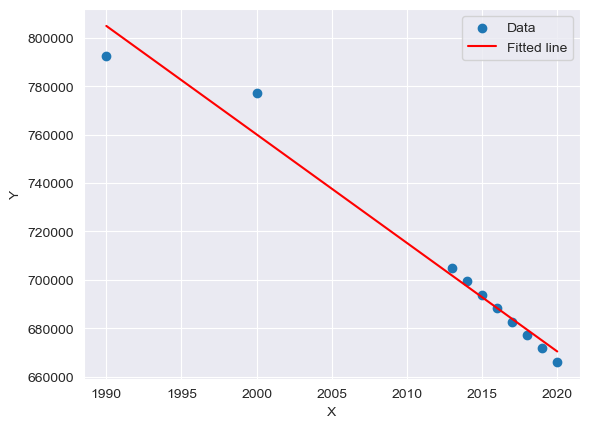

Fitted Parameters:
a = -4483.742134530644
b = 9727558.089102568


In [7]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def linear_function(x, a, b):
    """Linear function for fitting.
    
    Parameters:
    -----------
    x : numpy.ndarray
        The input x-values.
    a : float
        The slope of the line.
    b : float
        The y-intercept of the line.
        
    Returns:
    --------
    numpy.ndarray
        The predicted y-values for the given x-values.
    """
    return a * x + b

# Load data from CSV file
data = np.loadtxt('forestdata1.csv', delimiter=',')
x = data[0]  # First row as x-vector
y = data[6]  # INPUT SERIAL NUMBER OF COUNTRY as y-vectors

# Fit linear regression using curve_fit
popt, pcov = curve_fit(linear_function, x, y)

# Extract fitted parameters
a_fit, b_fit = popt

# Create predicted y-values using fitted parameters
y_pred = linear_function(x, a_fit, b_fit)

# Plot the original data and the fitted line
plt.scatter(x, y, label='Data')
plt.plot(x, y_pred, 'r', label='Fitted line')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

# Print the fitted parameters
print("Fitted Parameters:")
print("a =", a_fit)
print("b =", b_fit)